In [31]:
import math
from PIL import Image

num_cols = 5
num_rows = 5

In [79]:
movesByColumn =  [['r','b','r'],['b','b'],['r','b','r'],['r','r','b','r'],['b','r','b']]
chanceByColumn = [[1,4,3],[1,8],[7,4,5],[8,3,1,8],[7,5,7]]

In [80]:
def get_board_element(prob, player):
    square = Image.new(mode="RGB", size=(100, 100))
    pixel_map = square.load()
    width, height = square.size
    for i in range(width):
        for j in range(height):

            if(math.sqrt((i - width/2)*(i - width/2)+(j - height/2)*(j - height/2)) < width/2):

                # RGB value of orange.
                pixel_map[i, j] = (255,255,255)
                
                #if(math.sqrt((i - width/2)*(i - width/2)+(j - height/2)*(j - height/2)) >= (width/2)*(1 - (prob/8))):
                if(j > (1 - (prob/8))*height):
                    if (player == 'r'):
                        pixel_map[i, j] = (224, 90, 55)
                    if (player == 'b'):
                        pixel_map[i, j] = (62,54,52)
                    
            # the following else part will fill the
            # rest part with color yellow
            else:

                # RGB value of classic connect4
                pixel_map[i, j] = (245,216,75)
    return square
    

In [81]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [82]:
def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [83]:
def displayBoard():
    board = ['0'] * num_cols * num_rows
    probabilities = [0] * num_cols * num_rows

    for i in range(num_cols):
        for j in range(len(movesByColumn[i])):
            board[i + (num_rows - 1 - j) * num_cols] = movesByColumn[i][j]
            probabilities[i + (num_rows - 1 - j) * num_cols] = chanceByColumn[i][j]
    
    output = get_board_element(probabilities[0],board[0])
    for i in range(1, num_cols):
        output = get_concat_h(output, get_board_element(probabilities[i],board[i]))
        
    for j in range(1, num_rows):  
        row = get_board_element(probabilities[j * num_cols],board[j*num_cols])
        for i in range(1, num_cols):
            row = get_concat_h(row, get_board_element(probabilities[i + j * num_cols],board[i + j * num_cols]))
        output = get_concat_v(output, row)
        
    display(output)

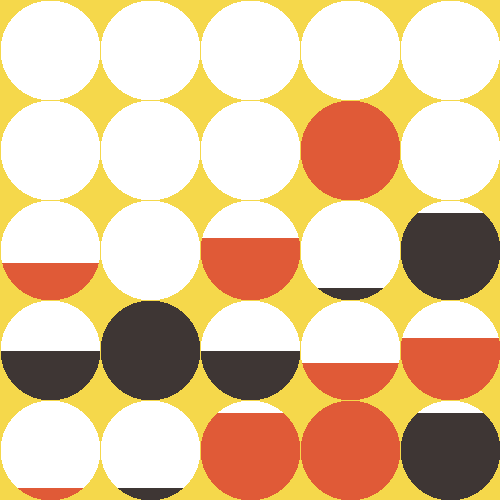

In [84]:
displayBoard()